## <center> **EDA on Vehicle Insurance** </center>

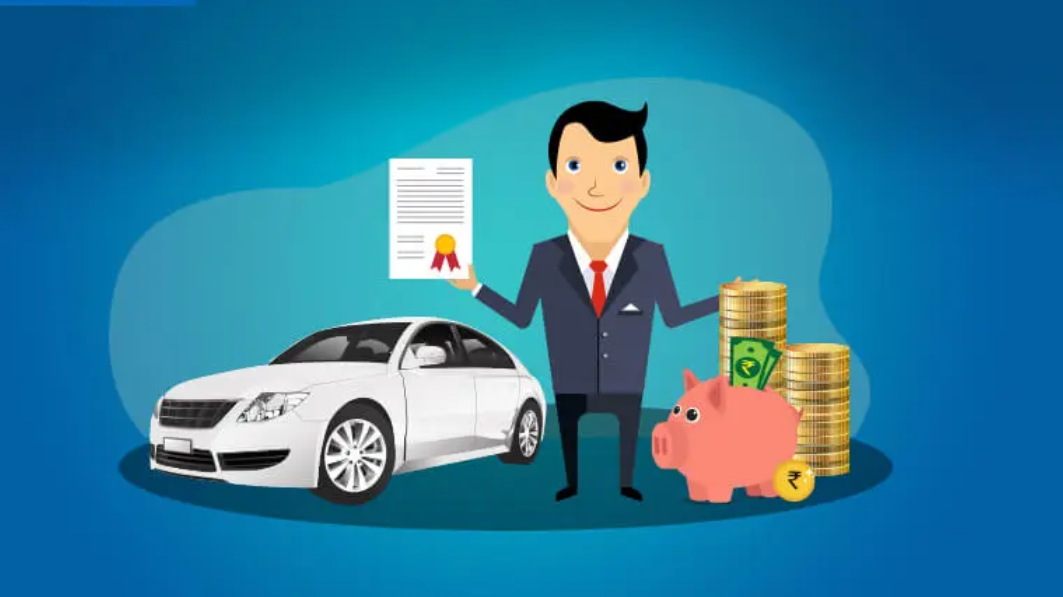 


#### <center> Objective </center>

The analysis aims to identify key patterns and correlations within the dataset, focusing on customer demographics, insurance behavior, and annual premium trends. Insights highlight outlier impact, customer segmentation by age and gender, regional variations, and factors influencing policy response rates, enabling data-driven strategies for optimizing insurance marketing and pricing.

#### <center> submitted by: Rohit Sharma </center>

#### <center> submitted to : Neeraj ma'am </center>

#### Step 1: import Necessary Libraries

In [283]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

####  load the dataset 

##### Load the Dataset

In [287]:
df = pd.read_csv("C:/Users/123/Downloads/Vehicle_Insurance.csv")

##### display the dataset to understand its structure

In [290]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


#### Step 3:Data Overview and initial inspection 

##### 1.inspect the first and last few rows:
##### using df.head() and df.tail() to see a preview.

##### display the first few rows of the dataset to understand its structure 


In [295]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


##### display the last few rows of the dataset to understand its structure 

In [298]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


#### 2.Understand data types and missing values:
##### use df.info() to display column types and check for missing values.

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### 3.Get summary statistics:
##### use df.describe() for numerical columns to understand distribution, including mean, median and range.

In [304]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### Step 4: Data Cleaning 

#### 1. Handlng missing value 
##### identify and handle any missing values

In [308]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### 2. Handling Outliers
#### Identify outliers in numerical columns like Age and Annual_Premium using box plots.


- Visualised Outliers in dataset

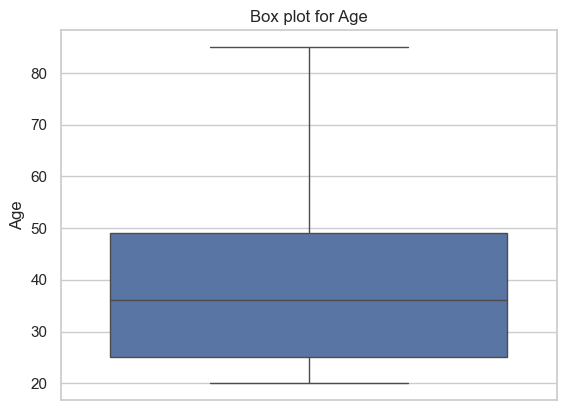

In [312]:
sns.boxplot(df['Age'])
plt.title('Box plot for Age')
plt.show()

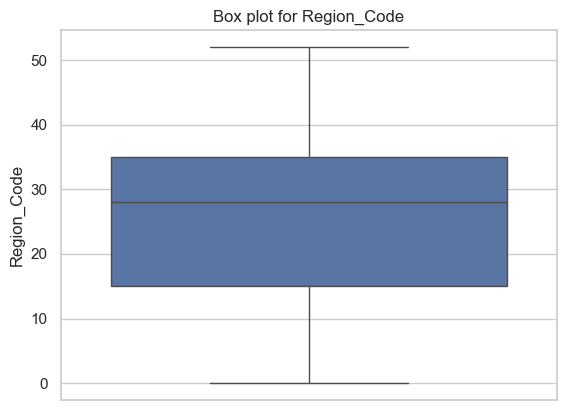

In [313]:
sns.boxplot(df['Region_Code'])
plt.title('Box plot for Region_Code')
plt.show()

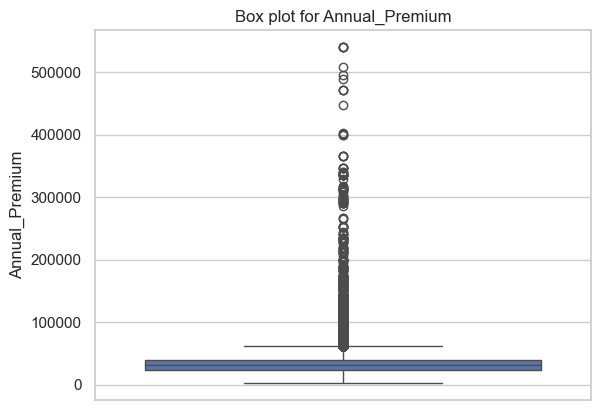

In [315]:
sns.boxplot(df['Annual_Premium'])
plt.title('Box plot for Annual_Premium')
plt.show()

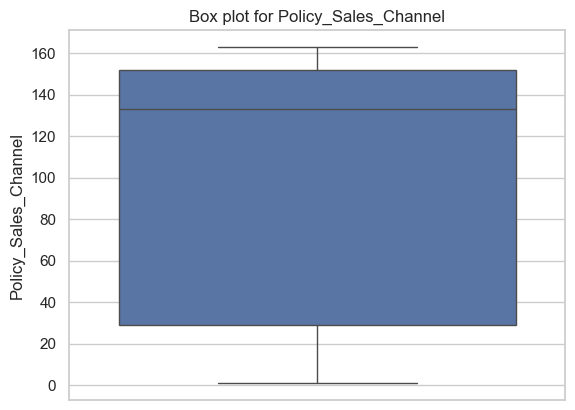

In [318]:
sns.boxplot(df['Policy_Sales_Channel'])
plt.title('Box plot for Policy_Sales_Channel')
plt.show()

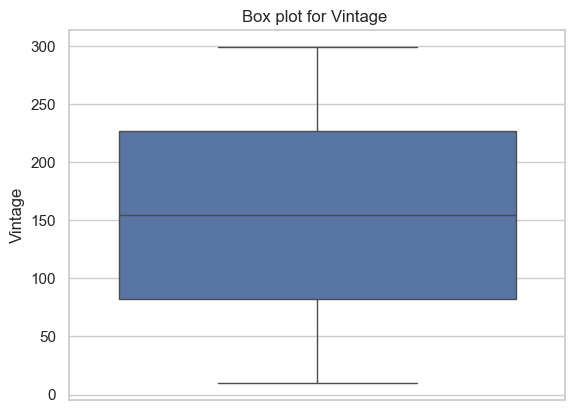

In [320]:
sns.boxplot(df['Vintage'])
plt.title('Box plot for Vintage ')
plt.show()

#### **Findings and Insights**
- The Annual Premium column in the dataset contains numerous outliers. These outliers can skew the results and lead to inaccurate predictions in any models built using this data. Therefore, it is essential to address and treat these outliers to ensure the integrity and reliability of any subsequent analysis.

- On the other hand, the remaining columns exhibit minimal or no outliers and can be considered stable. Consequently, the primary focus should be on handling the outliers in the Annual Premium column.
  

#### **Replace outliers with mean, median and Lower and Upper limit respectively**

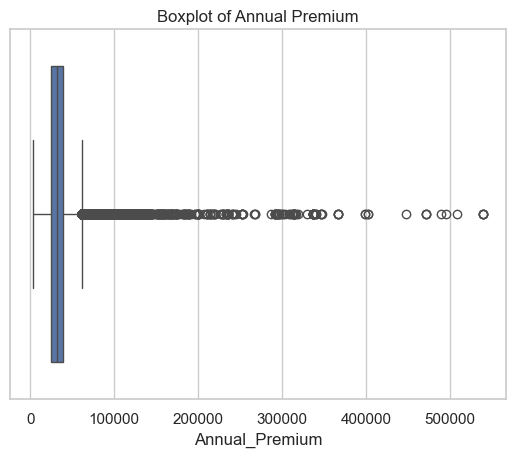

In [325]:
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Boxplot of Annual Premium')
plt.show()

# Calculate quartiles
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
threshold = 1.5 * IQR

# Identify outliers
outliers = df[(df['Annual_Premium'] < Q1 - threshold) | (df['Annual_Premium'] > Q3 + threshold)]


- **Outliers Values In Annual Premium Column**

In [330]:
outlier_values=df[(df.Annual_Premium <=lower_bound)|(df.Annual_Premium>= upper_bound)]
outlier_values

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


- **Replace Outliers With Median Value**

In [333]:
medianv=df[(df['Annual_Premium']>lower_bound)&(df['Annual_Premium']<upper_bound)]['Annual_Premium'].median()
medianv

31319.0

- Replace outliers with lower and upper limit

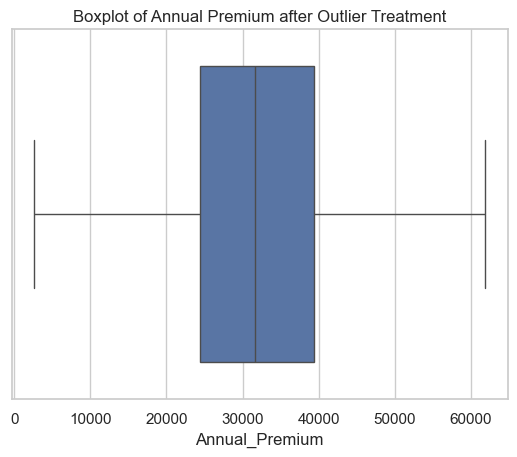

In [327]:
# Handle the outliers at the threshold values
df2=pd.DataFrame(df)
df2['Annual_Premium'] = df2['Annual_Premium'].clip(lower=Q1 - threshold, upper=Q3 + threshold)

# Recheck the boxplot
sns.boxplot(x='Annual_Premium', data=df2)
plt.title('Boxplot of Annual Premium after Outlier Treatment')
plt.show()

#### Step 5: Data Visualization 

#### 1. Age Distribution 
##### Visualize the distribution of Age to understand the age demographics of customers.

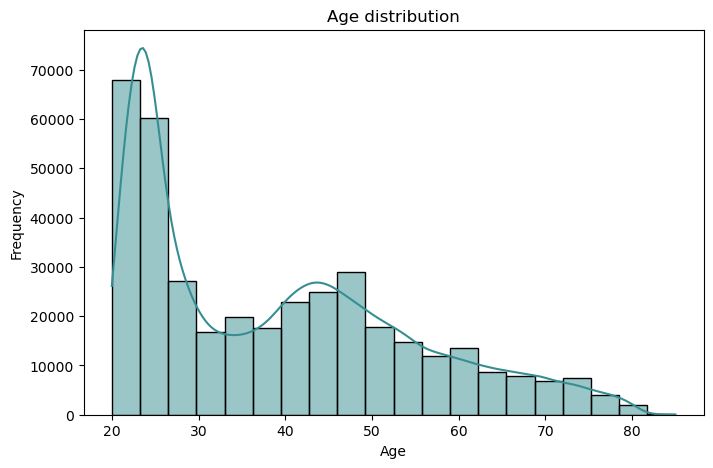

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=20,kde=True,color="#378E92")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### **Observations:**
 - The histogram shows the distribution of ages within the dataset. The distribution is right-skewed, with a peak around the age of 25-30. This indicates a higher proportion of younger individuals in the dataset. The tail extending towards older ages suggests a smaller but still significant number of older individuals.
#### **Recommendations:**
 - The age distribution chart shows a right-skewed distribution, indicating a higher concentration of younger individuals. To drive growth in vehicle insurance, focus on targeting the younger demographic with tailored insurance products and marketing strategies. Additionally, consider expanding product offerings to cater to the specific needs of older customers, such as specialized insurance for senior citizens.


#### 2. Gender Distribution 
##### Visualize the gender distribution to see if there is any imbalance.

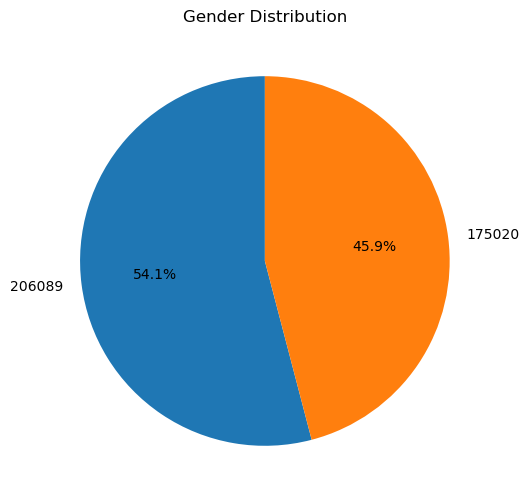

In [63]:
gender_counts=df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts,autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

In [64]:
df.Gender.value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

#### **Observations:**
- The gender distribution chart reveals that males constitute a larger portion of the customer base, accounting for 54.1% compared to 45.9% for females. This suggests that male drivers are more likely to opt for vehicle insurance policies.
#### **Recommendations:**
- The gender distribution chart reveals a slight male dominance in the dataset. To drive growth, consider targeted marketing campaigns that address the specific needs and preferences of both genders

#### 3. Premium Analysis
##### Examine the distribution of Annual Premium to understand common premium values.

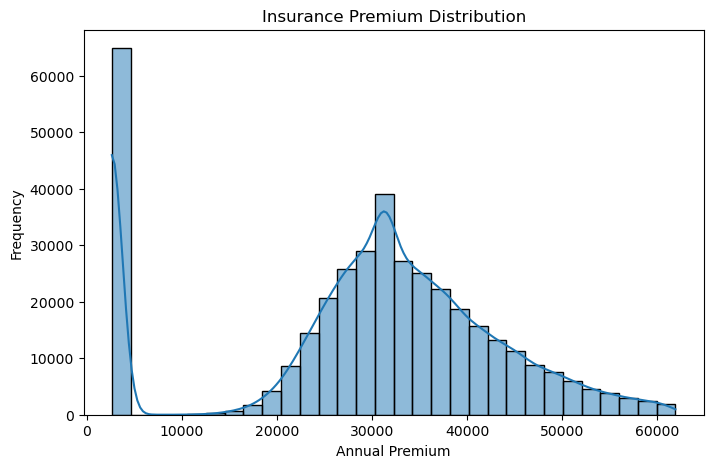

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Premium'],bins=30,kde=True)
plt.title("Insurance Premium Distribution")
plt.xlabel("Annual Premium")
plt.ylabel("Frequency")
plt.show()

#### **Observations:**
- The insurance premium distribution chart shows a right-skewed distribution, indicating that most policies have lower annual premiums, with a smaller proportion of policies having significantly higher premiums. This could be due to factors like vehicle type, model, age, and driver profile.

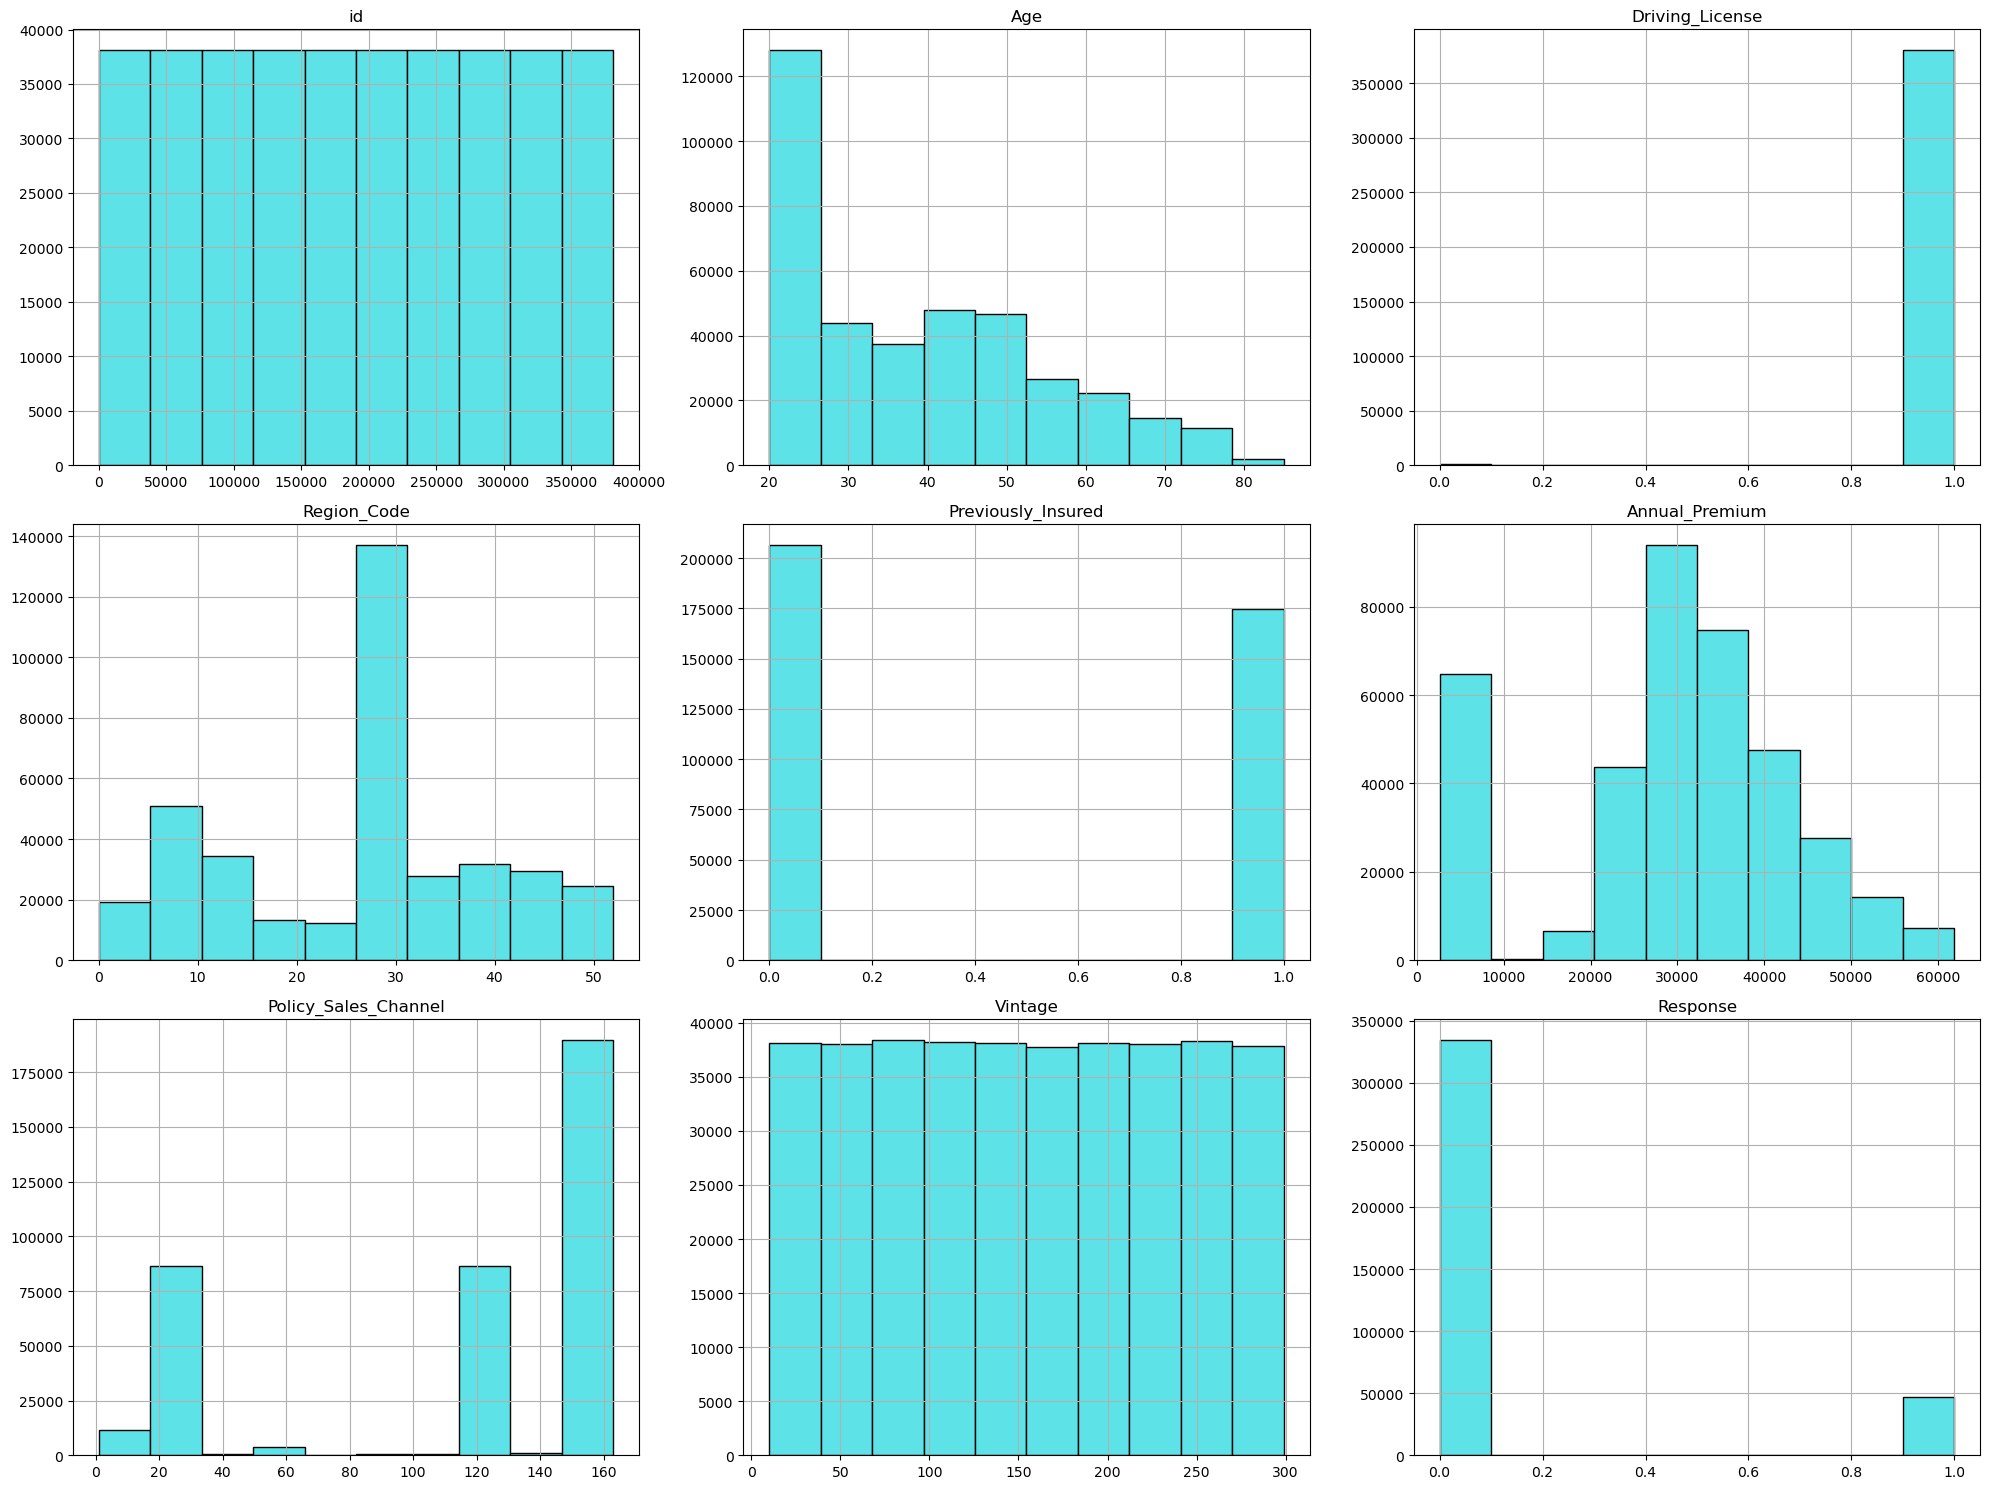

In [69]:
df.hist(figsize=(20,15),color='#5DE2E7',edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

#### **Observations and Recommendations from the Charts**
- **1. Region Code**

#### **Observation:** The distribution appears uneven, suggesting varying levels of activity across different regions.
#### **Recommendation:** Analyze the performance of each region and identify areas with high potential for growth. Focus on targeted marketing and promotional strategies for regions with lower penetration.
- **2. Age**

####  **Observation:** The distribution is right-skewed, indicating a larger proportion of younger customers.
#### **Recommendation:** Leverage this demographic advantage by offering tailored insurance products and marketing campaigns that appeal to younger customers. Consider discounts for safe driving and good academic records.
- **3. Driving License**

#### **Observation:** The distribution is heavily skewed towards one category, suggesting a high percentage of customers with valid driving licenses.
#### **Recommendation:** Focus on customer retention strategies to ensure long-term loyalty. Offer value-added services and loyalty programs to retain existing customers.
- **4. Annual Premium**

#### **Observation:** The distribution is right-skewed, indicating a higher number of customers with lower annual premiums.
#### Recommendation: Implement targeted marketing campaigns to upsell higher-premium products to existing customers. Offer flexible payment options and bundling discounts to encourage higher premium purchases.
- **5. Region Code**

#### **Observation:** Similar to the first chart, the distribution is uneven, suggesting varying levels of activity across different regions.
#### **Recommendation:** (Same as the first chart)
- **6. Previously Insured**

#### **Observation:** The distribution is skewed towards one category, indicating a high percentage of customers who were previously insured.
####  **Recommendation:** Leverage this existing customer base by offering seamless renewal processes and personalized recommendations for additional coverage.
-  **7. Vintage**

#### **Observation:** The distribution is relatively even, indicating a balanced customer base across different policy durations.
#### **Recommendation:** Implement retention strategies to increase policy tenure and reduce churn. Offer incentives for long-term policyholders, such as discounts on renewals or additional benefits.
- **8. Policy Sales Channel**

#### **Observation:** The distribution is uneven, indicating varying levels of activity across different sales channels.
#### **Recommendation:** Analyze the performance of each sales channel and identify opportunities for optimization. Focus on channels with higher conversion rates and lower acquisition costs.
- **9. Response**

#### **Observation:** The distribution is skewed towards one category, indicating a high percentage of customers who responded to marketing campaigns.
#### **Recommendation:** Continue to refine marketing strategies to improve response rates. Use data-driven insights to personalize marketing messages and optimize campaign timing.

#### Step 6: Feature Analysis and Relationships

#### 1.Target Variable (Response)
##### Visualize the distribution of the Response Variables, Which indicates if a customer made an insurance claim.

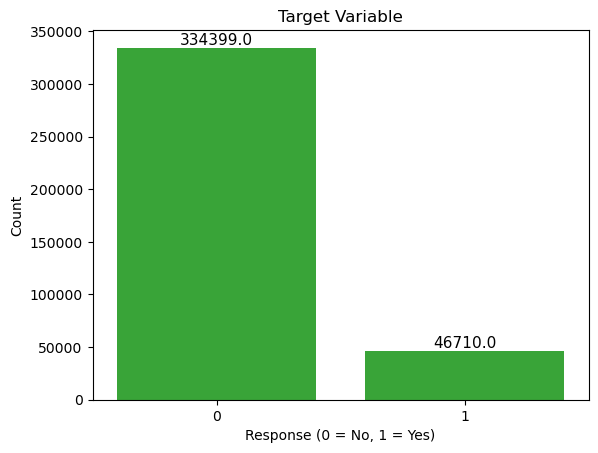

In [75]:
# Create the count plot
ax = sns.countplot(data=df, x='Response',color="#27B626")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
plt.title("Target Variable")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

##### Display counts for each response type

In [78]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

#### **Observations:**
- The target variable distribution shows a significant class imbalance, with a much higher proportion of instances belonging to the negative class (0). This indicates a potential challenge in building accurate predictive models, as the model may be biased towards the majority class.

#### 2. Driving License Distribution
##### check the distribution of Driving License holders in the dataset.

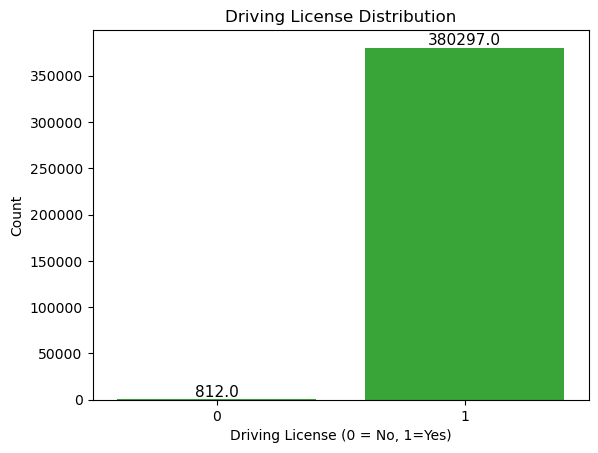

In [81]:
# Create the count plot
ax = sns.countplot(data=df, x='Driving_License',color="#27B626")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
plt.title("Driving License Distribution")
plt.xlabel("Driving License (0 = No, 1=Yes)")
plt.ylabel("Count")
plt.show()

##### display counts for each driving license 

In [83]:
df.Driving_License.value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

#### **Observations:**
- The driving license distribution chart shows a significant imbalance, with a vast majority of customers having a driving license. This indicates that the presence of a driving license is a strong predictor of vehicle insurance eligibility.

#### 3. Distribution of Previously insured 
##### display counts for each previosly insurance

In [89]:
df.Previously_Insured.value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

##### Analyze the Previously Insured feature to see the proportion of insured and uninsured customers.

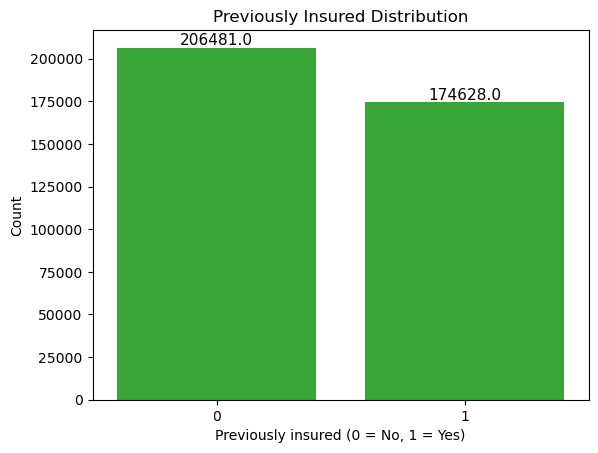

In [91]:
# Create the count plot
ax = sns.countplot(data=df, x='Previously_Insured',color='#27B626')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
plt.title("Previously Insured Distribution")
plt.xlabel("Previously insured (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### **Observations:**
- The "Previously Insured" distribution shows a significant imbalance, with a larger proportion of customers having prior insurance experience. This indicates that past insurance experience could be a strong predictor of future insurance behavior.

#### 4. Response Rate by Previously Insured
##### Explore the average claim response rate based on whether the customer was previously insured.

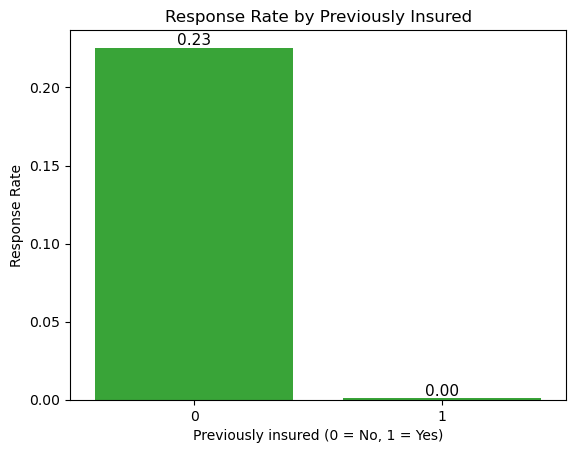

In [94]:
# Calculate the mean response rate grouped by 'Previously_Insured'
insured_response = df.groupby('Previously_Insured')['Response'].mean().reset_index()

# Create the bar plot
ax = sns.barplot(x='Previously_Insured', y='Response', data=insured_response,color='#27B626')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
plt.title("Response Rate by Previously Insured")
plt.xlabel("Previously insured (0 = No, 1 = Yes)")
plt.ylabel("Response Rate")
plt.show()

#### **Observations:**
- The chart shows a significant difference in response rates between previously insured and non-insured customers. Customers with prior insurance experience are significantly less likely to respond to marketing campaigns compared to those who have not been previously insured.

#### Step 7: Age Distribution:
##### Analyze the age distribution within the dataset and its impact on insurance claims.

#### Age Distribution By customers

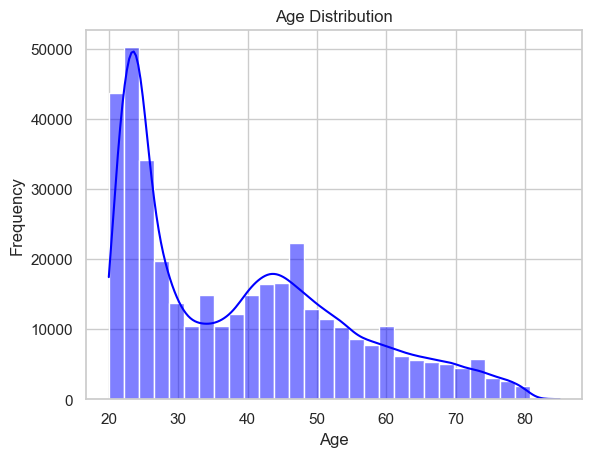

In [99]:
sns.set(style="whitegrid")
sns.histplot(df['Age'],bins=30,kde=True,color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Age Distribution By Gender


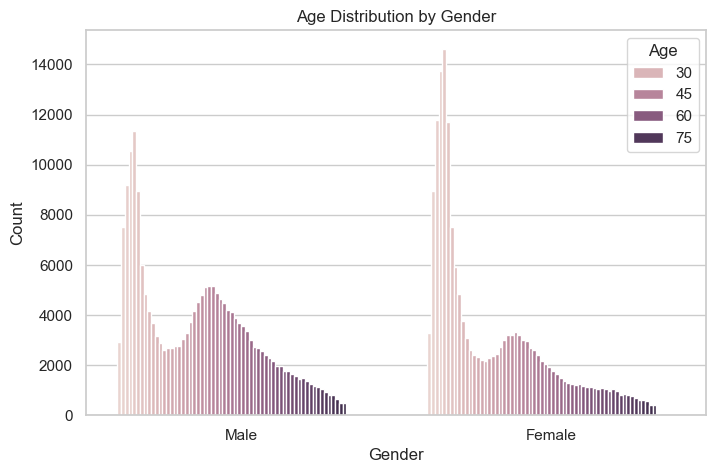

In [101]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

#### **Observations:**
- The age distribution is right-skewed, indicating a larger proportion of younger customers. This suggests a potentially higher risk profile due to less driving experience and higher accident rates among younger drivers.
#### **Recommendations:**
- **Risk-Based Pricing:** Implement a risk-based pricing strategy that considers factors like age and driving experience to accurately assess risk and set appropriate premiums.
- **Targeted Marketing:** Develop targeted marketing campaigns to attract and retain younger customers, emphasizing the importance of insurance coverage and offering discounts or incentives for safe driving.

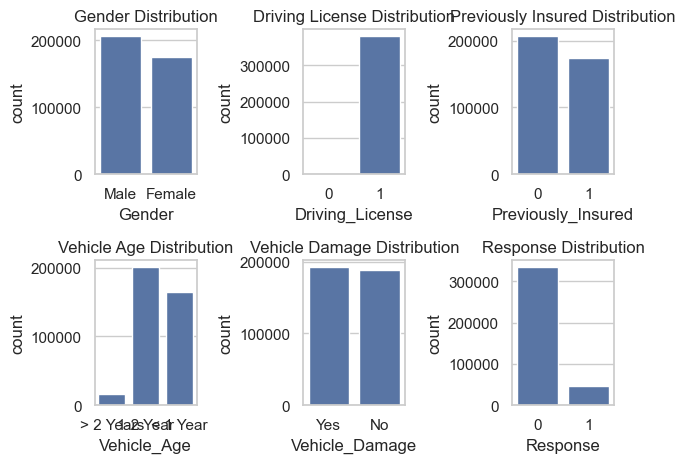

In [103]:
plt.subplot(2,3,1)
sns.countplot(x='Gender',data=df)
plt.title("Gender Distribution")

plt.subplot(2,3,2)
sns.countplot(x='Driving_License',data=df)
plt.title("Driving License Distribution")

plt.subplot(2,3,3)
sns.countplot(x='Previously_Insured',data=df)
plt.title("Previously Insured Distribution")

plt.subplot(2,3,4)
sns.countplot(x='Vehicle_Age',data=df)
plt.title("Vehicle Age Distribution")

plt.subplot(2,3,5)
sns.countplot(x='Vehicle_Damage',data=df)
plt.title("Vehicle Damage Distribution")

plt.subplot(2,3,6)
sns.countplot(x='Response',data=df)
plt.title("Response Distribution")

plt.tight_layout()
plt.show()

#### **Observations and Recommendations**
####  **Gender Distribution:**
- **Observation:** The distribution is relatively balanced between male and female customers.
- **Recommendation:** Implement gender-neutral marketing strategies to appeal to both genders.
#### **Driving License Distribution:**
- **Observation:** The majority of customers have a valid driving license.
- **Recommendation:** Leverage this information to target customers with personalized offers and incentives.
####  **Previously Insured Distribution:**
- **Observation:** A significant proportion of customers have prior insurance experience.
- **Recommendation:** Focus on retention strategies to retain existing customers and offer them attractive renewal options.
#### **Vehicle Age Distribution:**
- **Observation:** The distribution is skewed towards newer vehicles.
- **Recommendation:** Target customers with older vehicles and offer them special discounts or incentives to upgrade their insurance policies.
#### **Vehicle Damage Distribution:**
- **Observation:** The majority of vehicles have not been damaged.
- **Recommendation:** Implement telematics programs to track driver behavior and offer discounts for safe driving.
#### **Response Distribution:**
- **Observation:** The majority of customers have not responded to marketing campaigns.
- **Recommendation:** Refine marketing strategies to improve response rates, such as personalized messaging and targeted offers.

#### Step 8: Premium Analysis:
##### Investigate the distribution of insurance premiums and their correlation with claim frequencies.

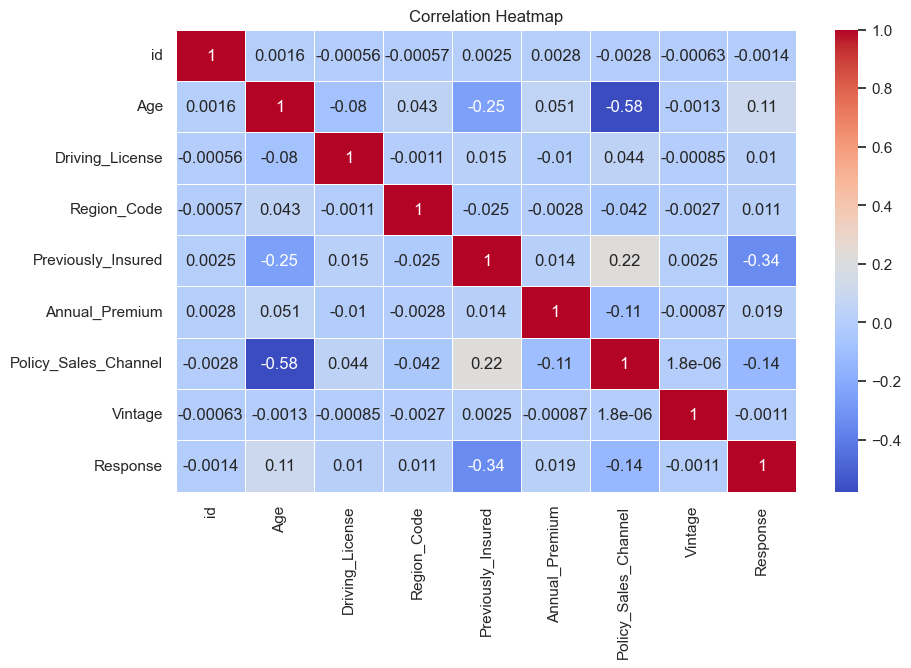

In [106]:
# Assuming df is your DataFrame
df1 = pd.DataFrame(df)

# Select only numeric columns
numeric_df = df1.select_dtypes(include='number')

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### **Observations:**
- **Age and Response:** There is a positive correlation between age and response rate. This suggests that older customers are more likely to respond to marketing campaigns.
- **Policy Sales Channel and Response:** There is a negative correlation between the policy sales channel and response rate. This indicates that certain sales channels may be less effective in generating responses.
- **Previously Insured and Response:** There is a negative correlation between previously insured customers and response rate. This suggests that customers who have been previously insured are less likely to respond to marketing campaigns.
#### **Recommendations:**
- **Age-Based Targeting:** Tailor marketing campaigns to different age groups, focusing on personalized messaging and incentives that resonate with each segment.
- **Channel Optimization:** Analyze the performance of different sales channels and focus on those with higher response rates. Consider optimizing marketing efforts for these channels to improve customer engagement.
- **Retention Strategies:** Implement effective retention strategies to maintain relationships with previously insured customers. Offer personalized renewal offers and incentives to encourage continued business.
- **Data-Driven Marketing:** Utilize data analytics to identify high-value customers and tailor marketing efforts accordingly. This can help optimize marketing spend and improve response rates.

#### Step 9: Gender Analysis:

#### Driving License by Gender
##### Explore the relationship between Gender and Driving License Status. 

In [110]:
df2=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df2

,Gender,Driving_License
0,Female,175020
1,Male,206089


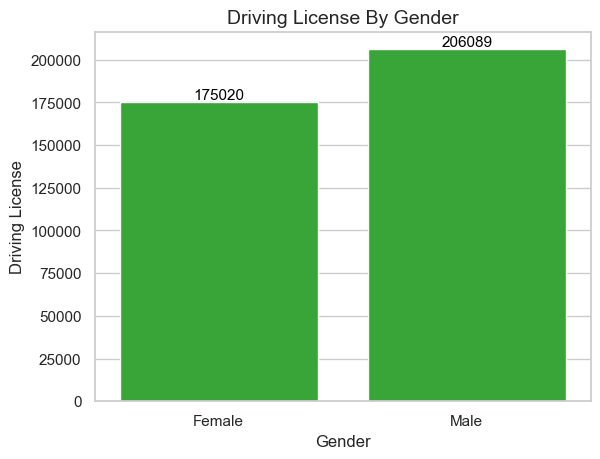

In [112]:
# Create the bar plot
ax = sns.barplot(x="Gender", y="Driving_License", data=df2,color="#27B626")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
plt.title("Driving License By Gender",fontsize=14)
plt.xlabel("Gender",fontsize=12)
plt.ylabel("Driving License",fontsize=12)
plt.show()

#### **Observations:**
- The chart shows a higher number of male customers with driving licenses compared to female customers. This suggests a potential market opportunity for targeting female customers.
#### **Recommendations:**
- **Targeted Marketing:** Implement targeted marketing campaigns for female customers, highlighting the importance of insurance coverage and offering special discounts or incentives for women drivers.
- **Product Customization:** Develop customized insurance products that cater to the specific needs and preferences of female customers, such as additional coverage for safety features or discounts for safe driving.
- **Partnership with Women's Organizations:** Collaborate with women's organizations to promote the importance of insurance and offer exclusive discounts or benefits to their members.

#### Step 10: Vehicle Age and Claims:
##### Examine the impact of vehicle age on insuance claims.

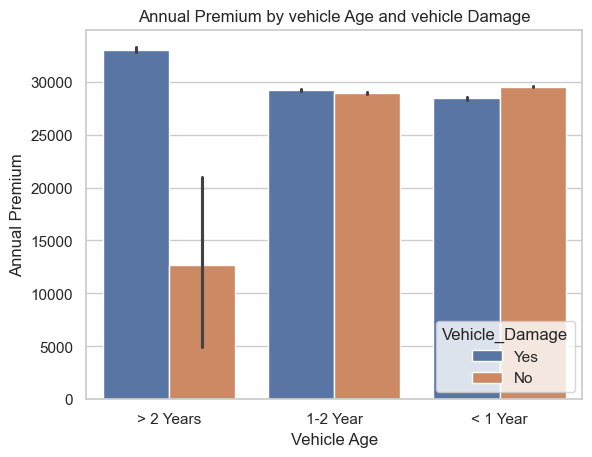

In [114]:
sns.barplot(data=df,x='Vehicle_Age',y='Annual_Premium',hue='Vehicle_Damage')
plt.title("Annual Premium by vehicle Age and vehicle Damage")
plt.xlabel("Vehicle Age")
plt.ylabel("Annual Premium")
plt.show()

#### **Observations:**
- The chart shows that vehicles with damage have significantly higher annual premiums compared to those without damage.
- Additionally, the annual premium increases as the vehicle age decreases.
#### **Recommendations:**
- **Risk-Based Pricing:** Implement a risk-based pricing model that accurately reflects the risk associated with different vehicle ages and damage histories.
- **Telematics Programs:** Consider using telematics devices to monitor driver behavior and offer discounts to safe drivers, regardless of vehicle age or damage history.
- **Customer Education:** Educate customers about the factors that influence insurance premiums and how they can mitigate risk to lower their costs.

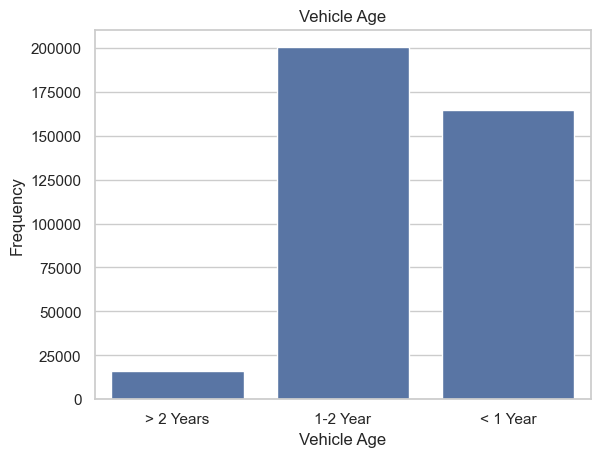

In [115]:
sns.countplot(data=df,x='Vehicle_Age')
plt.title("Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Frequency")
plt.show()

In [118]:
df3=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df3

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


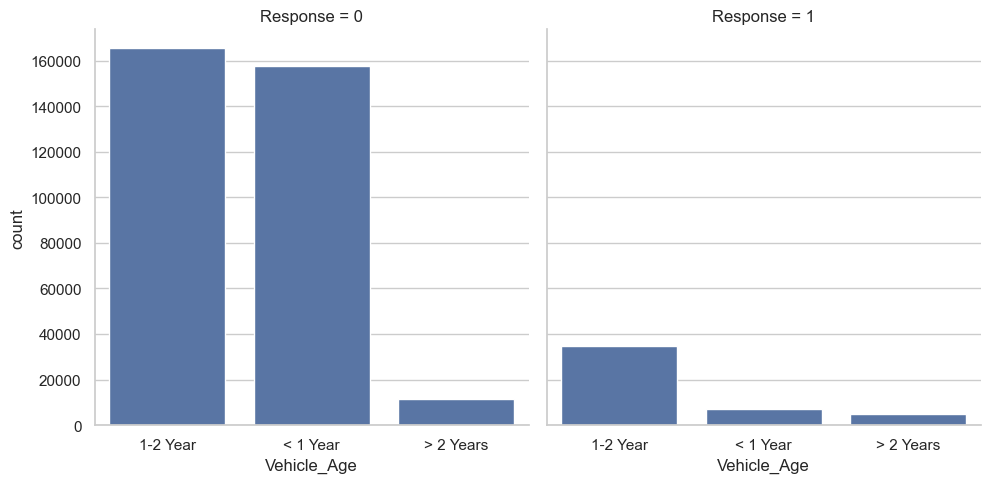

In [120]:
sns.catplot(x="Vehicle_Age",y="count",col="Response",data=df3,kind="bar")
plt.show()

#### Step 11: Region-wise Analysis:
##### Analyze patterns in Region Code to understand claim distribution by Region.

##### Region Code Distribution 

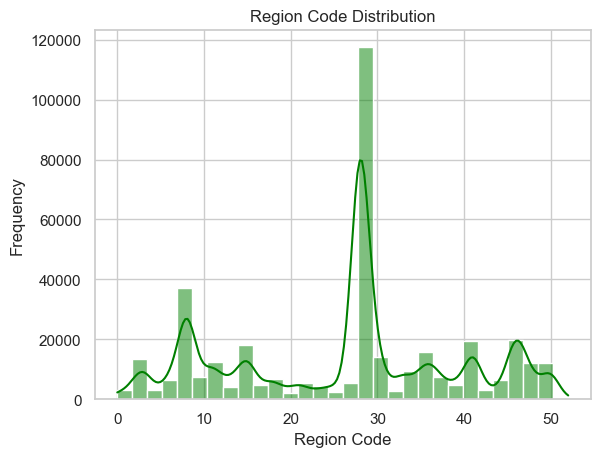

In [123]:
sns.histplot(df['Region_Code'],bins=30,kde=True,color='green')
plt.title("Region Code Distribution")
plt.xlabel("Region Code")
plt.ylabel("Frequency")
plt.show()

#### **Observations:**
-The region code distribution shows multiple peaks and valleys, indicating varying levels of customer activity across different regions. There are specific regions with significantly higher customer concentrations.
#### **Recommendations:**
- **Targeted Marketing:** Analyze the performance of different regions and focus marketing efforts on regions with higher potential.
- **Regional Pricing:** Consider implementing region-specific pricing strategies to account for differences in risk factors and customer preferences.
- **Local Partnerships:**  Partner with local businesses and organizations to expand your reach and build brand awareness in specific regions.

#### Step 12: Policy Analysis:
##### Analyze the distribution and impact of different policy types

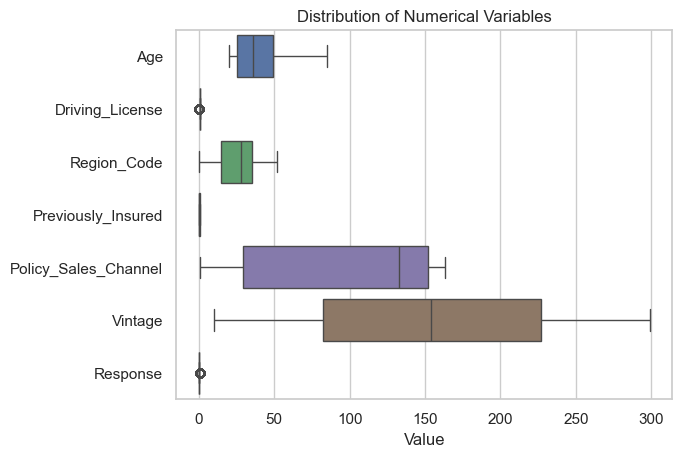

In [127]:
sns.boxplot(data=df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage', 'Response']], orient='h')
plt.title("Distribution of Numerical Variables")
plt.xlabel("Value")
plt.show()

#### Step 12: Claim Frequency by Vehicle Damage

##### investigate how Vehicle Damage affects the frequency of claims.

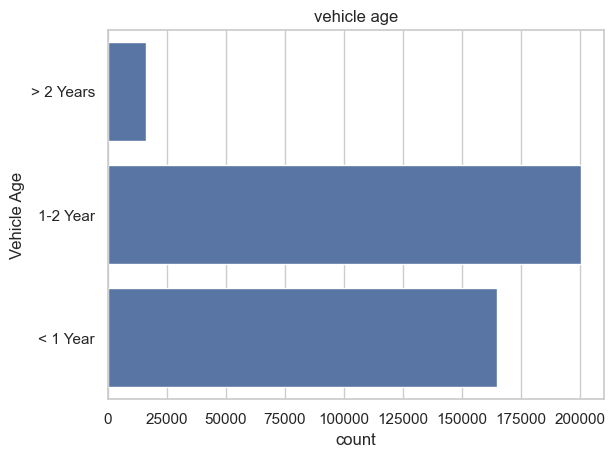

In [130]:
sns.countplot(df.Vehicle_Age)
plt.title("vehicle age")
plt.ylabel("Vehicle Age")
plt.show()

#### **Observations:**
- The majority of vehicles in the dataset are less than a year old, followed by vehicles between 1 and 2 years old. Vehicles older than 2 years represent the smallest proportion.
#### **Recommendations:**
- **Targeted Marketing:** Focus on targeting customers with newer vehicles, as they represent a significant portion of the market. Offer competitive pricing and value-added services to attract and retain these customers.
- **Risk-Based Pricing:** Implement a risk-based pricing model that considers vehicle age as a key factor. Older vehicles may have higher repair costs and increased risk of accidents, so adjusting premiums accordingly can help optimize pricing.

### <center>  Conclusion </center>

The analysis highlights key patterns across demographics, vehicle attributes, and customer behavior, emphasizing the importance of tailored marketing, risk-based pricing, and customer retention strategies. Younger customers and newer vehicles dominate the dataset, presenting opportunities for targeted campaigns and personalized offerings. Addressing class imbalances and optimizing regional and channel-specific approaches can significantly enhance engagement and business outcomes.

**This analysis provides insights for decision-making in vehicle insurance and can help tailor policies to customer needs.**